Number of Data Points in Hubble = 24
Number of Data Points in Lemaitre = 42
Hubble A = -36.039227372484405 Hubble B = 439.5096011609142 Hubble Uncertainity A = [ 7364.12863018 -5434.3812503 ] Hubble Uncertainity B = [-5434.3812503   5783.82030376]
Lemaitre A = 302.14130130561233 Lemaitre B = 230.7500529741166 Lemaitre Uncertainity A = [15497.07977062 -9341.14802659] Lemaitre Uncertainity B = [-9341.14802659  7437.50171793]
Chisquared: Hubble = 45.46279828406152 Lemaitre = 292.9294403142139
Correlation Coefficients: Hubble = 0.77644999095699 +/- -1.9834531078523796 Lemaitre = 0.38962396008063227 +/- -1.9798049245302123


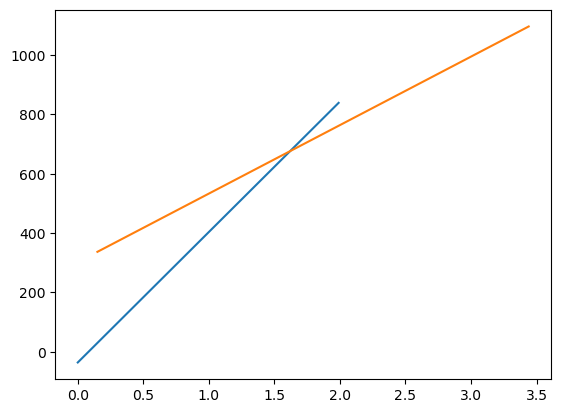

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
from math import sqrt
np.seterr(invalid='ignore')

dataHubble = np.loadtxt('../text-files/Hubble.txt', skiprows=1)
dateLemaitre = np.loadtxt('../text-files/Lemaitre.txt', skiprows=1)

hubblex = dataHubble[:,0]
hubbley = dataHubble[:,1]
hubbleunc = dataHubble[:,2]

lemaitrex = dateLemaitre[:,0]
lemaitrey = dateLemaitre[:,1]
lemaitreunc = dateLemaitre[:,2]

hubbleN = len(hubblex)
lemaitreN = len(lemaitrex)


print(f'Number of Data Points in Hubble = {hubbleN}\nNumber of Data Points in Lemaitre = {lemaitreN}')

def func(x,A,B):
    return B*x + A

paramhubble, param_covhubble = curve_fit(func, hubblex, hubbley)
paramlemaitre, param_covlemaitre = curve_fit(func, lemaitrex, lemaitrey)

Ahubble,Bhubble = paramhubble
Aunchubble, Bunchubble = param_covhubble
Alemaitre,Blemaitre = paramlemaitre
Aunclemaitre,Bunclemaitre = param_covlemaitre
errorHubble = np.sqrt(np.diag(param_covhubble))
errorLemaitre = np.sqrt(np.diag(param_covlemaitre))

print(f'Hubble A = {Ahubble} Hubble B = {Bhubble} Hubble Uncertainity A = {Aunchubble} Hubble Uncertainity B = {Bunchubble}')
print(f'Lemaitre A = {Alemaitre} Lemaitre B = {Blemaitre} Lemaitre Uncertainity A = {Aunclemaitre} Lemaitre Uncertainity B = {Bunclemaitre}')

xfitHubble =  np.linspace(hubblex[0], hubblex[-1], 24)
yfitHubble = func(xfitHubble, Ahubble, Bhubble)
xfitLemaitre =  np.linspace(lemaitrex[0], lemaitrex[-1], 42)
yfitLemaitre = func(xfitLemaitre, Alemaitre, Blemaitre)

dofHubble = len(hubblex)-len(paramhubble)
dofLemaitre = len(lemaitrex)-len(paramlemaitre)

def chisquared(ydata,yfit,error,dof):
    chisquared = np.sum(((ydata - yfit)/error)**2)
    return chisquared/dof

hubblechisquared = chisquared(hubbley,yfitHubble,hubbleunc,dofHubble)
lemaitrechisquared = chisquared(lemaitrey,yfitLemaitre,lemaitreunc,dofLemaitre)

print(f'Chisquared: Hubble = {hubblechisquared} Lemaitre = {lemaitrechisquared}')

def r_calc(x, y):
    r = 0
    sum_diff_xy = 0
    sum_xdiff_square = 0
    sum_ydiff_square = 0
    
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    
    sum_xdiff_square = sum((x- x_bar)**2)
    sum_ydiff_square =  sum((y-y_bar)**2)
    sum_diff_xy = sum((x-x_bar)*(y - y_bar))
    
    r = sum_diff_xy/np.sqrt(sum_xdiff_square*sum_ydiff_square)
    
    return r

def r_calc_unc(r,N):
    r = (1-r**2)/N-2
    # r = np.sqrt(r)
    # print(r,N)
    return r

hubbleR = r_calc(hubblex,hubbley)
hubbleRunc = r_calc_unc(hubbleR, hubbleN)
lemaitreR = r_calc(lemaitrex,lemaitrey)
lemaitreRunc = r_calc_unc(lemaitreR, lemaitreN)
# print(hubbleRunc,lemaitreRunc)

print(f'Correlation Coefficients: Hubble = {hubbleR} +/- {hubbleRunc} Lemaitre = {lemaitreR} +/- {lemaitreRunc}')

plt.plot(xfitHubble,yfitHubble)
plt.plot(xfitLemaitre, yfitLemaitre)



## Estimate for B is: The rate at which expansion occurs 

Number of Data Points in Hubble = 24
Number of Data Points in Lemaitre = 42
Hubble B = [412.91434199] Hubble Uncertainity B = [[1709.99308944]]
Lemaitre B = [412.8712457] Lemaitre Uncertainity B = [[2022.4992608]]
Chisquared: Hubble = 46.45381965197159 Lemaitre = 361.92974839552767
Correlation Coefficients: Hubble = 0.77644999095699 +/- -1.9834531078523796 Lemaitre = 0.38962396008063227 +/- -1.9798049245302123


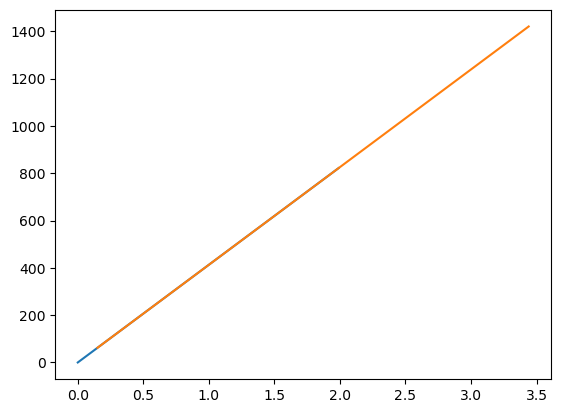

In [36]:
#Part B for A = 0

import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
from math import sqrt
np.seterr(invalid='ignore')

dataHubble = np.loadtxt('../text-files/Hubble.txt', skiprows=1)
dateLemaitre = np.loadtxt('../text-files/Lemaitre.txt', skiprows=1)

hubblex = dataHubble[:,0]
hubbley = dataHubble[:,1]
hubbleunc = dataHubble[:,2]

lemaitrex = dateLemaitre[:,0]
lemaitrey = dateLemaitre[:,1]
lemaitreunc = dateLemaitre[:,2]

hubbleN = len(hubblex)
lemaitreN = len(lemaitrex)


print(f'Number of Data Points in Hubble = {hubbleN}\nNumber of Data Points in Lemaitre = {lemaitreN}')

def func(x,B):
    return B*x

paramhubble, param_covhubble = curve_fit(func, hubblex, hubbley)
paramlemaitre, param_covlemaitre = curve_fit(func, lemaitrex, lemaitrey)

Bhubble = paramhubble
Bunchubble[0] = param_covhubble
Blemaitre = paramlemaitre
Bunclemaitre[0] = param_covlemaitre
errorHubble = np.sqrt(np.diag(param_covhubble))
errorLemaitre = np.sqrt(np.diag(param_covlemaitre))

print(f'Hubble B = {Bhubble} Hubble Uncertainity B = {Bunchubble}')
print(f'Lemaitre B = {Blemaitre} Lemaitre Uncertainity B = {Bunclemaitre}')

xfitHubble =  np.linspace(hubblex[0], hubblex[-1], 24)
yfitHubble = func(xfitHubble, Bhubble)
xfitLemaitre =  np.linspace(lemaitrex[0], lemaitrex[-1], 42)
yfitLemaitre = func(xfitLemaitre, Blemaitre)

dofHubble = len(hubblex)-len(paramhubble)
dofLemaitre = len(lemaitrex)-len(paramlemaitre)

def chisquared(ydata,yfit,error,dof):
    chisquared = np.sum(((ydata - yfit)/error)**2)
    return chisquared/dof

hubblechisquared = chisquared(hubbley,yfitHubble,hubbleunc,dofHubble)
lemaitrechisquared = chisquared(lemaitrey,yfitLemaitre,lemaitreunc,dofLemaitre)

print(f'Chisquared: Hubble = {hubblechisquared} Lemaitre = {lemaitrechisquared}')

def r_calc(x, y):
    r = 0
    sum_diff_xy = 0
    sum_xdiff_square = 0
    sum_ydiff_square = 0
    
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    
    sum_xdiff_square = sum((x- x_bar)**2)
    sum_ydiff_square =  sum((y-y_bar)**2)
    sum_diff_xy = sum((x-x_bar)*(y - y_bar))
    
    r = sum_diff_xy/np.sqrt(sum_xdiff_square*sum_ydiff_square)
    
    return r

def r_calc_unc(r,N):
    r = (1-r**2)/N-2
    # r = np.sqrt(r)
    return r

hubbleR = r_calc(hubblex,hubbley)
hubbleRunc = r_calc_unc(hubbleR, hubbleN)
lemaitreR = r_calc(lemaitrex,lemaitrey)
lemaitreRunc = r_calc_unc(lemaitreR, lemaitreN)

print(f'Correlation Coefficients: Hubble = {hubbleR} +/- {hubbleRunc} Lemaitre = {lemaitreR} +/- {lemaitreRunc}')

plt.plot(xfitHubble,yfitHubble)
plt.plot(xfitLemaitre, yfitLemaitre)



### Which Data Set is the Strongest Correlation?: Hubble had the strongest
### Which data set has better chi-squared per degress of freedom?: Hubble
### For which data set does the value of the Hubble-Lemaître constant remain nearly the same for non-zero and zero intercept?: Zero-Intercept value stays constant
### Whose data would you say was better? The Hubble data was better, because the correlation is strongest and the uncertainity was the lowest

### GM(R-r)^2 - Gmr^2 = r * omega^2 (R-r)^2

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import newton

G = 6.674e-11
M = 5.974e24
m = 7.348e22
R = 3.844e8
omega = 2.662e-6

def qauntic_r(r):
    x1 = G * M / r**2
    x2 = G * m/(R-r)**2
    x3 = r * omega**2
    answer = x1 - x2 - x3
    return answer

midpoint = R/2
ranswer = newton(qauntic_r, midpoint)
Rfrac = ranswer / R

print(f'r = {ranswer}(meters) Fraction of r Distance = {Rfrac}')

r = 326045071.66535544(meters) Fraction of r Distance = 0.8481921739473347
